# Decision Tree & Random Forest

# Introduction & Methods [^1]

[^1]: Sharma, A. (2023, September 26). Random Forest vs decision tree: Which is right for you?. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#:~:text=A.,data%2C%20especially%20on%20regression%20tasks. 

## Decision Tree
A tree structure that describes instance classification is called a classification decision tree model. The nodes and directed edges create a decision tree. Inner nodes and leaf nodes are the two distinct types of nodes. Leaf nodes indicate a class, while internal nodes represent as a feature or attribute.
A decision tree, additionally referred to as a binary or multinomial tree, is a predictive analytical model displayed as a tree structure.

One way to classify instances is to arrange them from a root node to a leaf node. The classifications to which the examples belong are called leaf nodes. Every node in the tree represents a test of an instance attribute, and every branch that follows the node represents a potential attribute value.

## Random Forest

Create a randomized forest with a large number of decision trees that are unrelated to one another. When a new input sample enters the forest after it has been obtained, every decision tree in the forest makes an assessment to determine which category (for classification algorithms) the sample should belong to. It then determines which category is more frequently selected, allowing the sample to be predicted for that category. Decision trees, which are essentially a method of partitioning space into hyperplanes and halving the current space each time, make up a random forest. Basically Random Forest are composite by many decision tree.

## Apply to the dataset

For my dataset of Mobile phones, I used a decision tree to do the classification. Based on the mobile phone prices, the function ratings of the mobile phone, for example, the camera rating, display rating, battery rating, etc. Based on those data, the decision tree model should predict the label of whether the public is willing to buy or not. The predicted label was divided into binary classification: not willing, and very willing. The decision tree model will give the final result.

# codes


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# label modfication to binary

In [50]:
df=pd.read_csv("../../../data/01-modified-data/after_clean_mobile_phone_rating.csv")

In [51]:
df['buying_intent'] = df['buying_intent'].replace('moderately_willing', 'not_willing')

In [52]:
df['buying_intent'] = df['buying_intent'].replace('very_willing', 1)
df['buying_intent'] = df['buying_intent'].replace('not_willing', 0)

In [23]:
Y = df['buying_intent']
temp1 = df.drop('buying_intent', axis=1)
temp2 = temp1.drop('Launch Date', axis=1)
X = temp2.drop('Device', axis=1)


In this part, I modified the label, and change the label into binary classification in order better training. I label the Very_willing as 1 and not willing as 0.

# EDA

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Launch Price,153.0,773.542484,376.630595,139.0,459.0,799.0,999.0,1799.0
CAMERA,153.0,111.274510,26.744708,51.0,94.0,117.0,130.0,156.0
SELFIE,153.0,130.065359,6.664589,83.0,130.0,130.0,130.0,149.0
AUDIO,153.0,124.241830,11.857169,86.0,120.0,124.0,132.0,161.0
DISPLAY,153.0,128.183007,11.031914,87.0,125.0,128.0,133.0,152.0
BATTERY,153.0,114.627451,15.107894,75.0,106.0,114.0,126.0,152.0
buying_intent,153.0,0.326797,0.470583,0.0,0.0,0.0,1.0,1.0


In [46]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)
target_counts = df['buying_intent'].value_counts()
frac1=target_counts[0]/(target_counts[0]+target_counts[1])
frac2=target_counts[1]/(target_counts[0]+target_counts[1])
print("Number of points with target=0: ", target_counts[0], frac1)
print("Number of points with target=1: ", target_counts[1], frac2)

Number of points with target=0:  103 0.673202614379085
Number of points with target=1:  50 0.32679738562091504


(7, 7)


<Axes: >

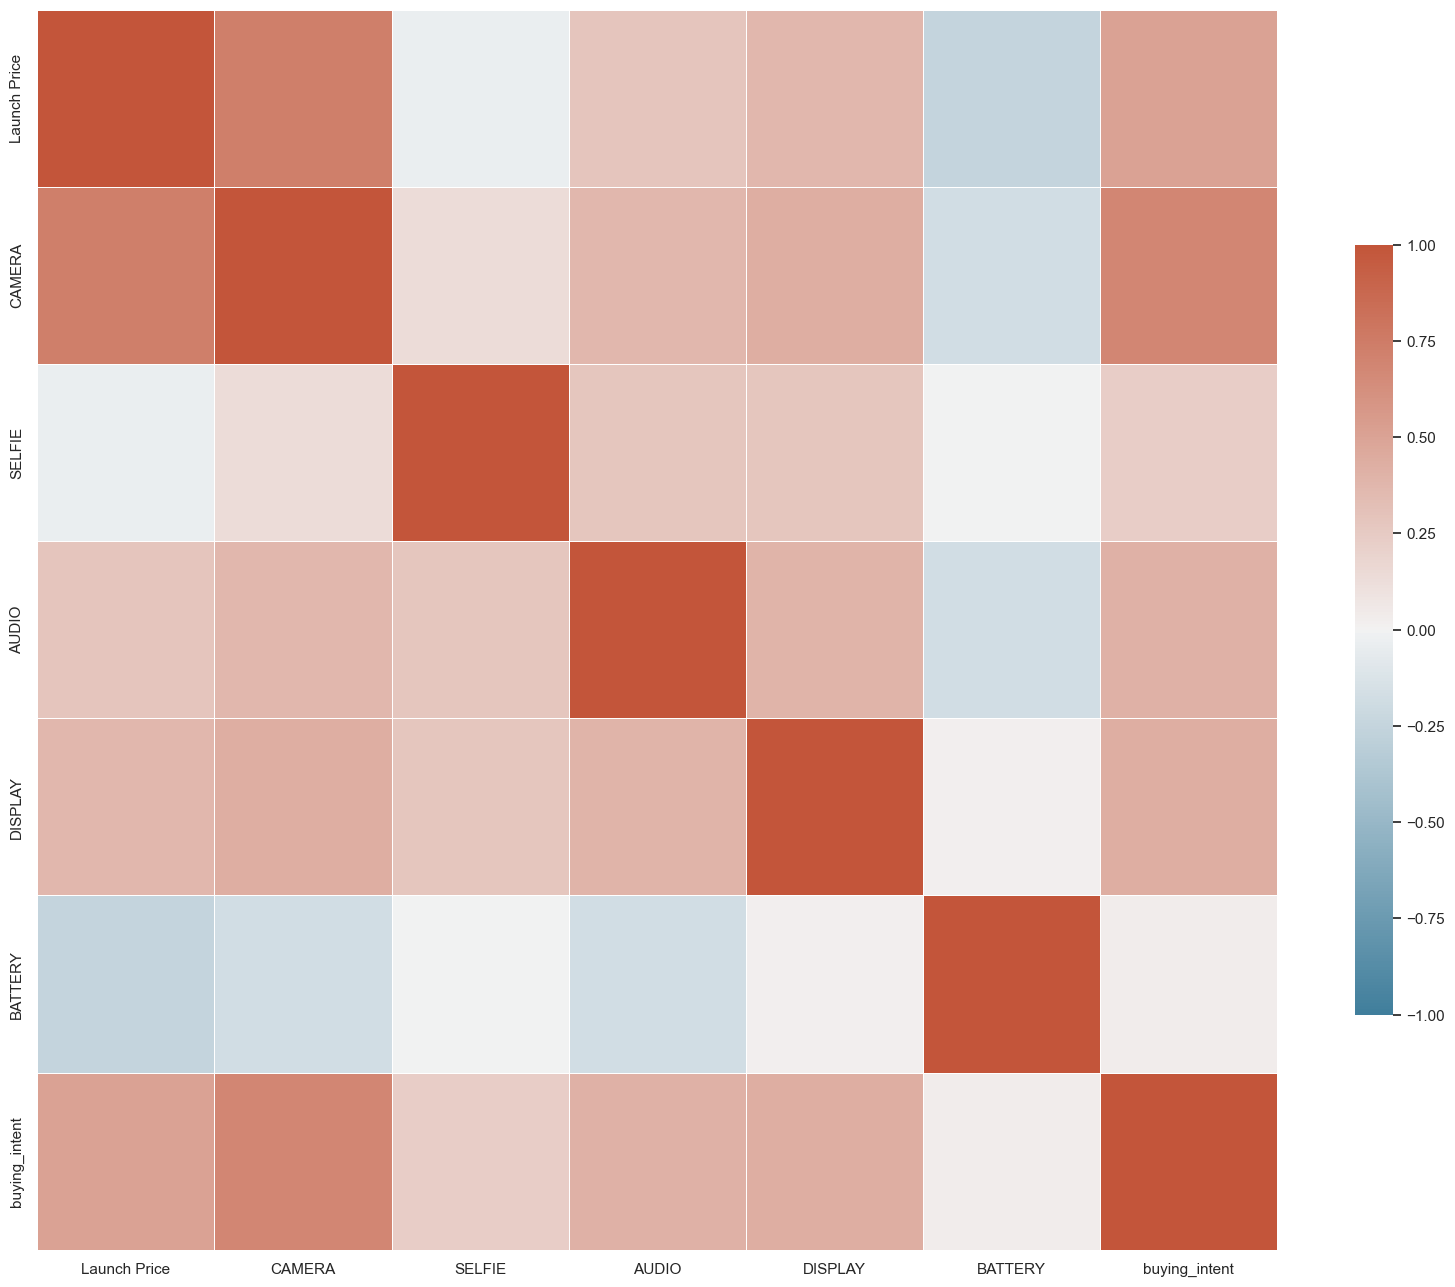

In [54]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
df=df.drop('Device', axis=1)
df=df.drop('Launch Date', axis=1)
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

I some EDA for this part, as shown, the launch price is actually kind od high correlated to the launch Price.

# Tree model

## split train set and test set

In [57]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("X TRAINING SHAPES:",x_train.shape)
print("Y TRAINING SHAPES:",y_train.shape)
print("X TEST SHAPES:",x_test.shape)
print("Y TEST SHAPES:",y_test.shape)

X TRAINING SHAPES: (122, 6)
Y TRAINING SHAPES: (122,)
X TEST SHAPES: (31, 6)
Y TEST SHAPES: (31,)


## Train Tree Model

In [28]:
#### INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [29]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [32]:
from sklearn.metrics import confusion_matrix

def confusion_plot(Y_test, Y_pred):
    matrix = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision_1 = precision_score(Y_test, Y_pred, pos_label = 1)
    recall_1 = recall_score(Y_test, Y_pred, pos_label = 1)
    precision_0= precision_score(Y_test, Y_pred, pos_label = 0)
    recall_0 = recall_score(Y_test, Y_pred, pos_label = 0)
    print("ACCURACY: ", accuracy)
    print("NEGATIVE RECALL (Y=0): ",recall_0 )
    print("NEGATIVE PRECISION (Y=0):",precision_0) 
    print("POSITIVE RECALL (Y=1):",recall_1) 
    print("POSITIVE PRECISION (Y=1):", precision_1)
    print(matrix)
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

### result

------TRAINING------
ACCURACy:  1.0
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[88  0]
 [ 0 34]]


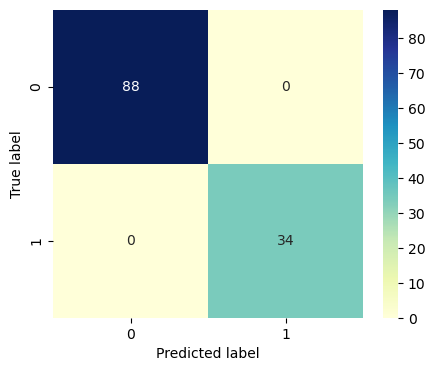

------TEST------
ACCURACy:  0.967741935483871
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 0.9375
POSITIVE RECALL (Y=1): 0.9375
POSITIVE PRECISION (Y=1): 1.0
[[15  0]
 [ 1 15]]


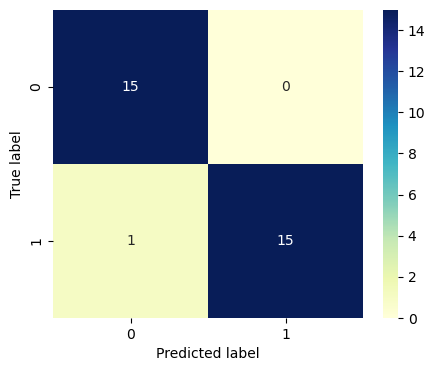

In [33]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

### Visualize Tree

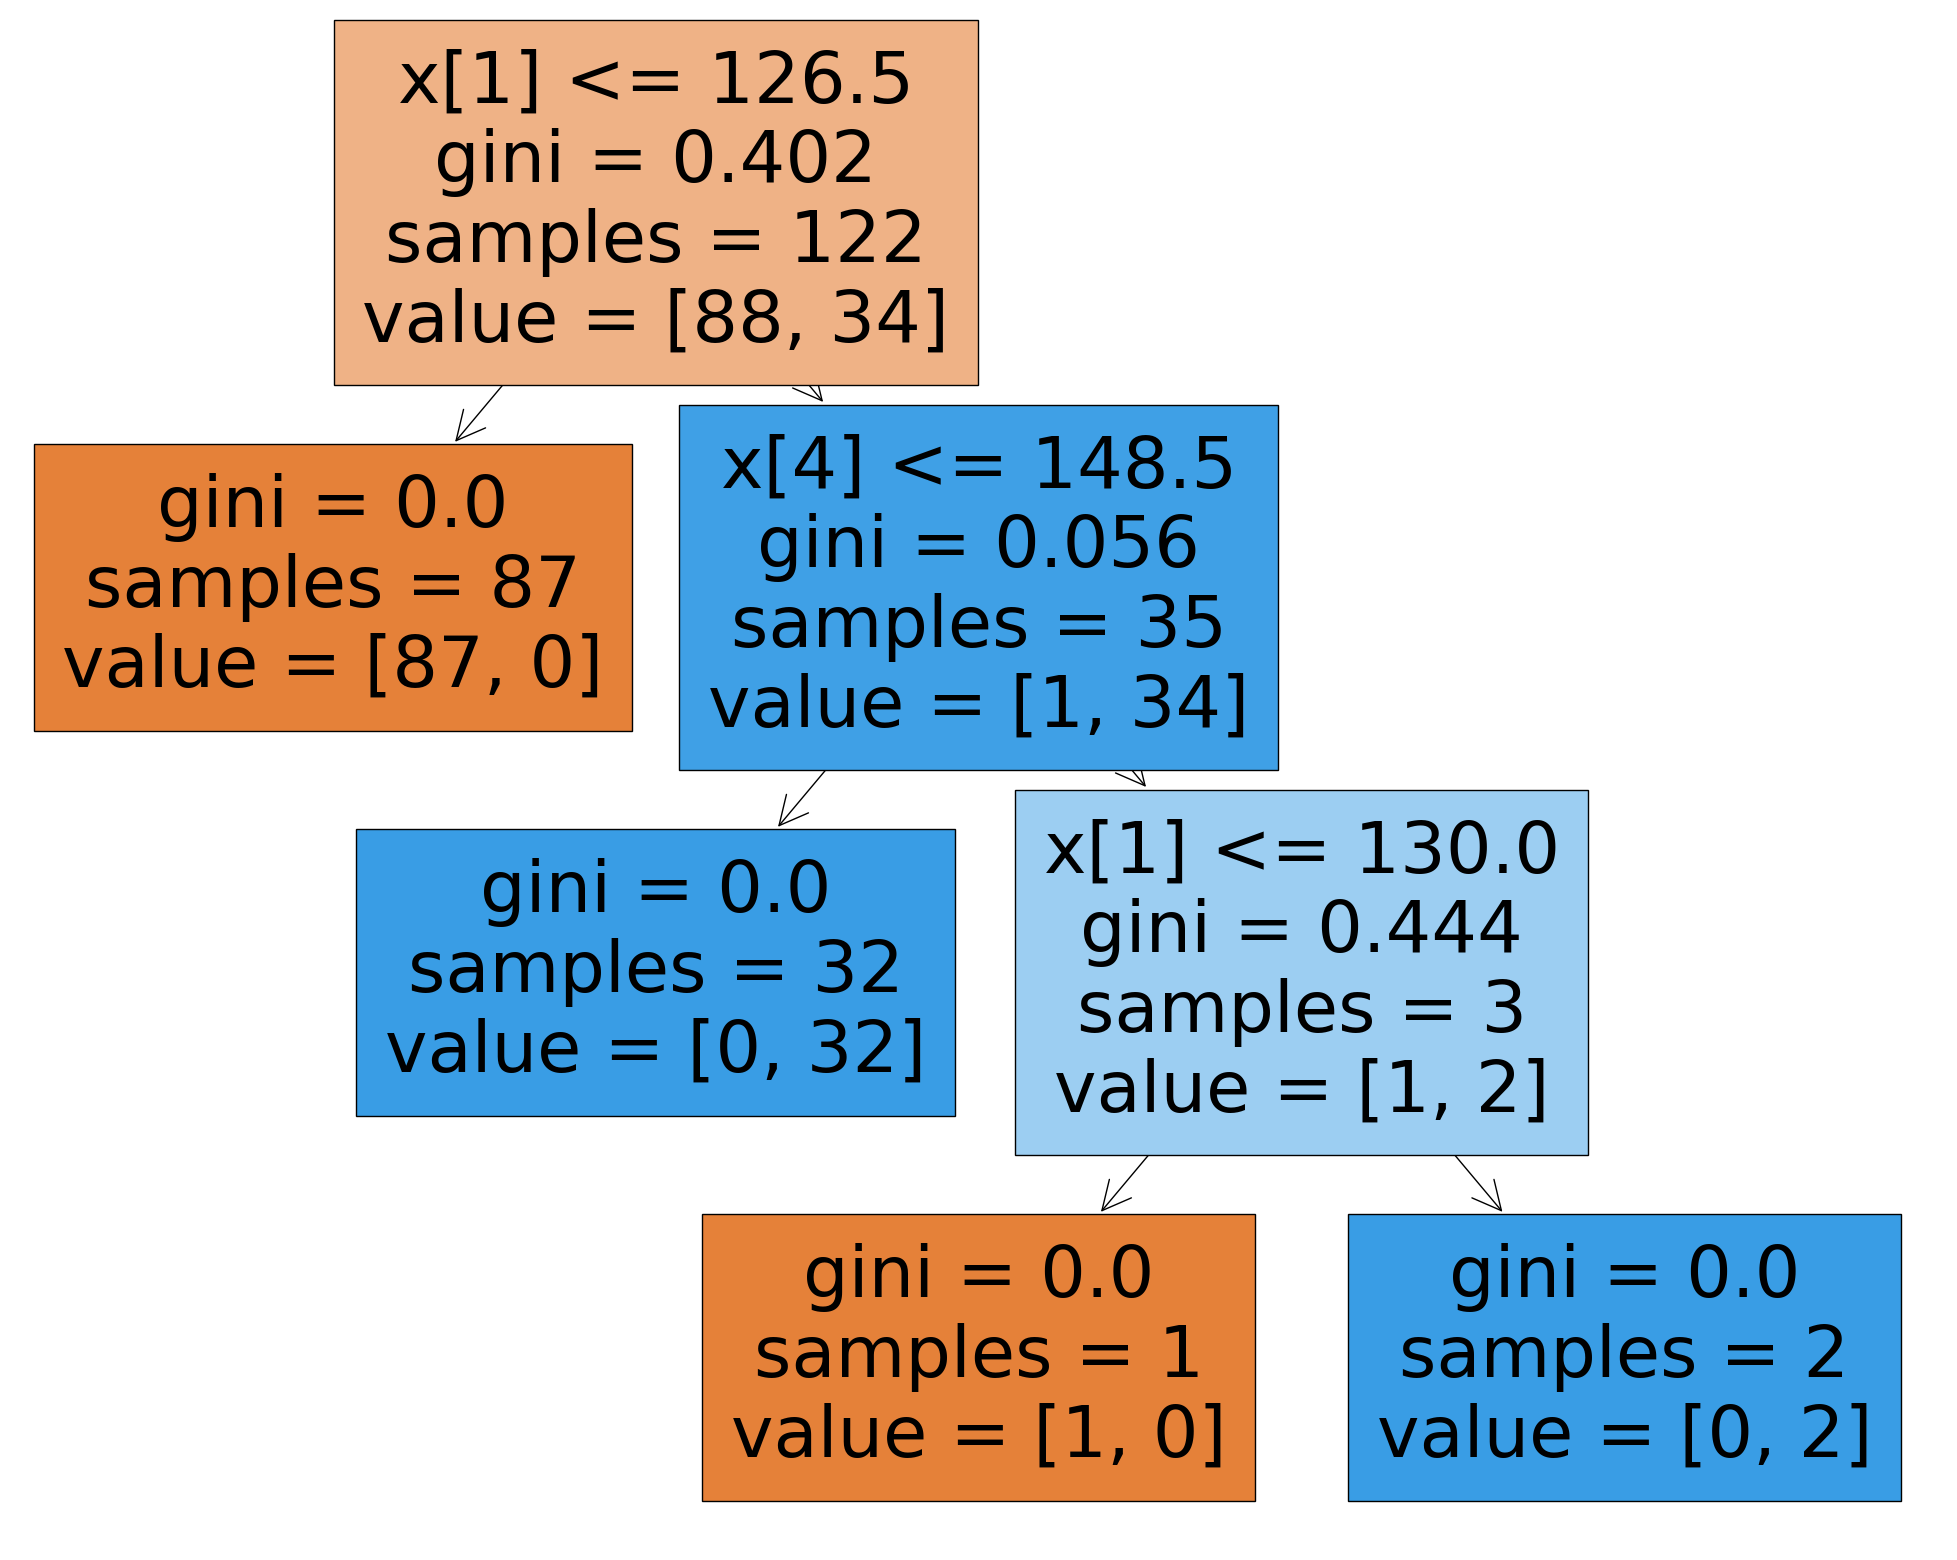

In [34]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
from sklearn import tree
def plot_tree(model,X,Y):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()
plot_tree(model,X,Y)

### Analysis
Based on the training result, 
ACCURACY:  1.0, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 1.0, 
POSITIVE RECALL (Y=1): 1.0, 
POSITIVE PRECISION (Y=1): 1.0, 
The accuracy, negative recall, negative precision, positive recall, positive precision are all 100%, which shows the training result can 100% predict the label, which is an awesome performance. Thus the model for the training set perform well.

Based on the test result:
ACCURACY:  0.967741935483871, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 0.9375, 
POSITIVE RECALL (Y=1): 0.9375, 
POSITIVE PRECISION (Y=1): 1.0, 
Accuracy is 0.9677 and accuracy measures the overall correctness of a classification model. 96.77% means the model is not 100% correctly predicted the data, which may needs a little imporve. The negative recall and precision is 1 which mean 100% right, which means it perform well. The native precision measures the accuracy of the model when it predicts the negative class (class 0), and the sore is 0.9375, which may needs improve. The positive recall measures the ability of the model to correctly identify instances belonging to the positive class (class 1), and the score is 0.9375, so this may needs a little imporvement as well.

Thus for better fit in the model, I did a hyper-parameter Turning to see if there's better model paramter to fit in.


## Hyper-parameter Turning

In [39]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,10):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, pos_label = 0), recall_score(y_train, yp_train, pos_label = 1)])

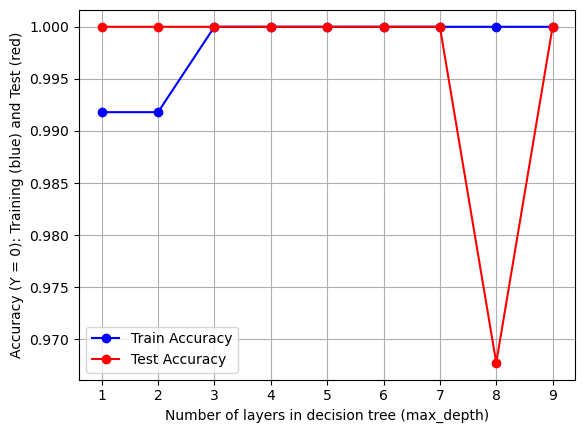

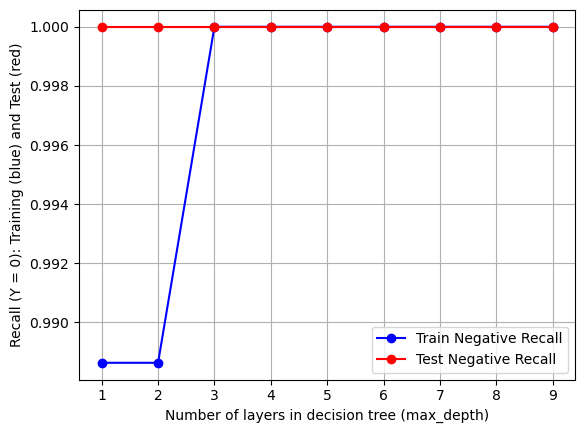

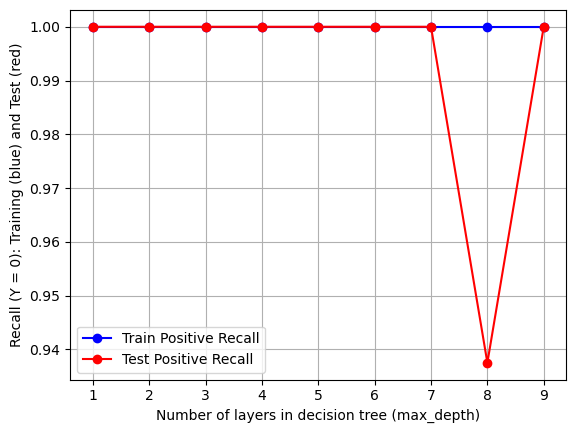

In [40]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY
train_df = pd.DataFrame(train_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])
test_df = pd.DataFrame(test_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])

plt.plot(train_df['max_depth'], train_df['accuracy'], 'o-', color = 'blue', label = 'Train Accuracy')
plt.plot(test_df['max_depth'], test_df['accuracy'], 'o-', color = 'red', label = 'Test Accuracy')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Accuracy (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_negative'], 'o-', color = 'blue', label = 'Train Negative Recall')
plt.plot(test_df['max_depth'], test_df['recall_negative'], 'o-', color = 'red', label = 'Test Negative Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_positive'], 'o-', color = 'blue', label = 'Train Positive Recall')
plt.plot(test_df['max_depth'], test_df['recall_positive'], 'o-', color = 'red', label = 'Test Positive Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

In the Hype-parameter above, I let the model iterate between different depth of decision tree and try to find the optimal layers of decision which gives the highest accuracy and recall score.
Based on the graph 1 above, we can see that when the layers=3 both the train and test accuracy can reach 100%. When the layers numbers become higher, the model show a little overfitting. Based on the graph2, we also can see that when the layers=3 both the train and test accuracy can reach 100%. When the layers numbers become higher, the model's performance did not improve.
Thus, we can conclude that when the depth=3, the model is optimal. Next we will use this optimal depth.

## Train optimal model

In [41]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACy:  1.0
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[88  0]
 [ 0 34]]


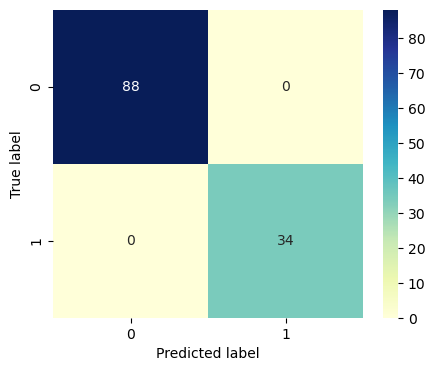

------TEST------
ACCURACy:  0.967741935483871
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 0.9375
POSITIVE RECALL (Y=1): 0.9375
POSITIVE PRECISION (Y=1): 1.0
[[15  0]
 [ 1 15]]


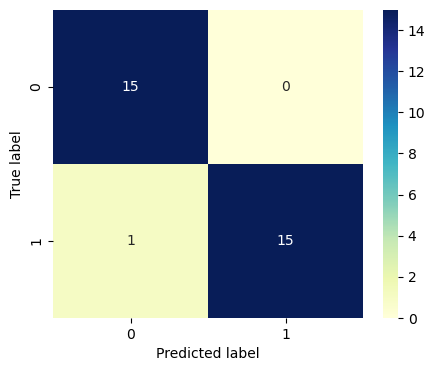

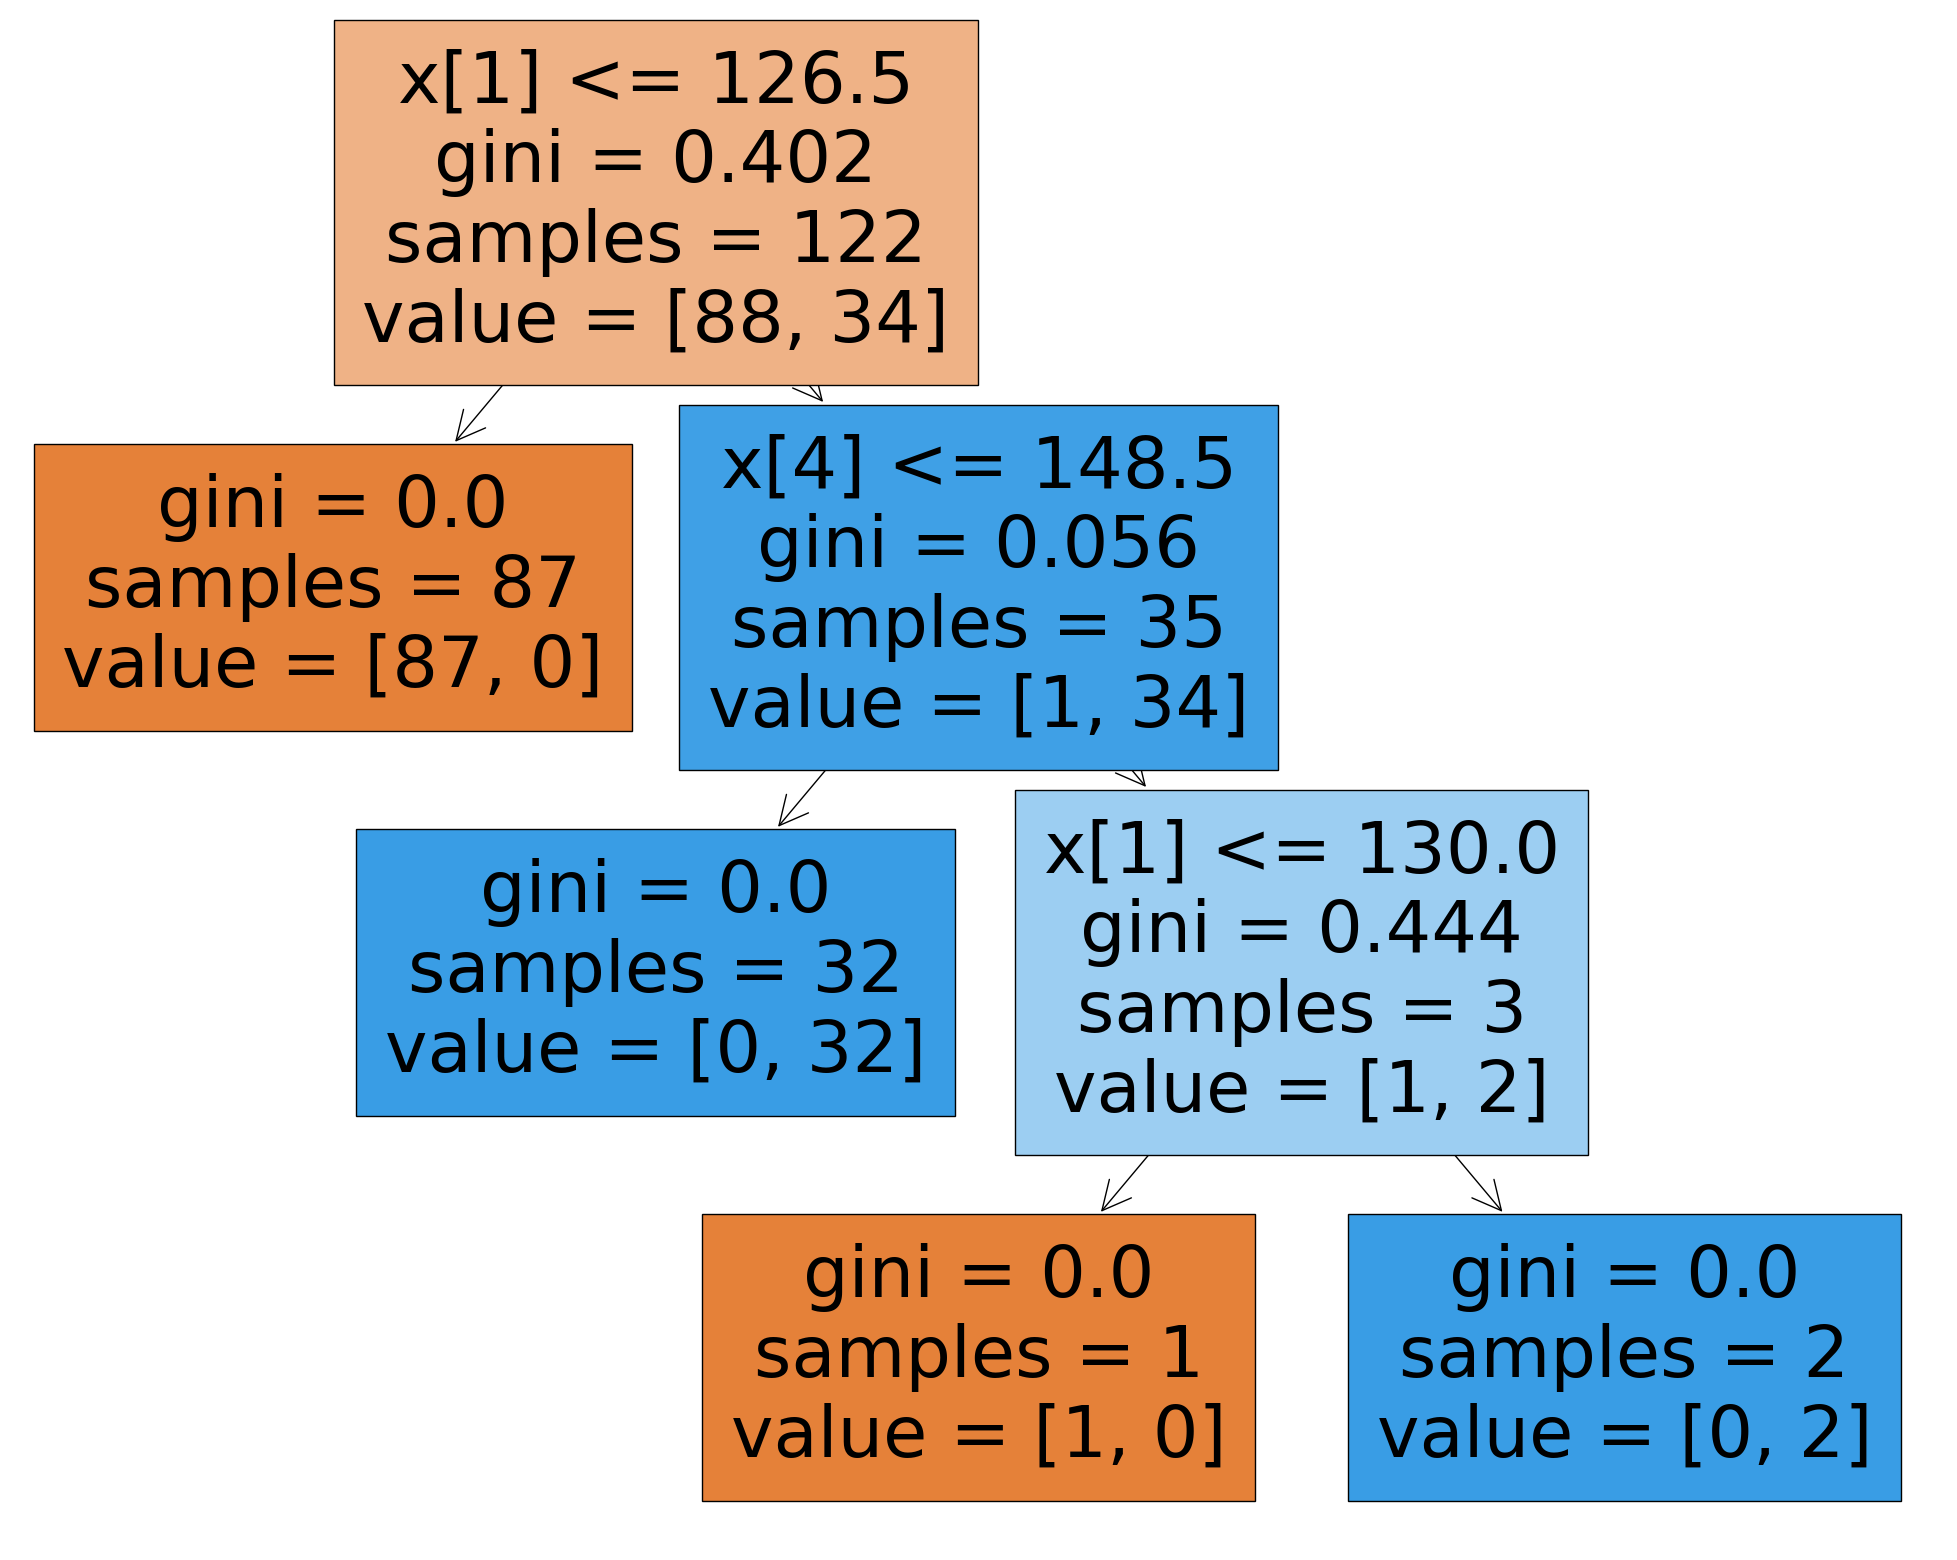

In [42]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)

### Analysis
Based on the training and test result, the optimal result is actually the result we had interpreted before. Thus when the the tree's layers=3, the model reach the optimal status and give us the test score as shown:
ACCURACY:  0.967741935483871, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 0.9375, 
POSITIVE RECALL (Y=1): 0.9375, 
POSITIVE PRECISION (Y=1): 1.0, 

Even though the score are not all 100%, the accuracy, negative precision,and positive recall are all higher than 90%, they are good enough to prove the model perform well to predict the label.

# Random Forest

## Split data

In [58]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("X TRAINING SHAPES:",x_train.shape)
print("Y TRAINING SHAPES:",y_train.shape)
print("X TEST SHAPES:",x_test.shape)
print("Y TEST SHAPES:",y_test.shape)

X TRAINING SHAPES: (122, 6)
Y TRAINING SHAPES: (122,)
X TEST SHAPES: (31, 6)
Y TEST SHAPES: (31,)


## Random Forest training

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model = model.fit(x_train, y_train)

yp_train = model.predict(x_train)
yp_test = model.predict(x_test)


## Result

------TRAINING------
ACCURACy:  1.0
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 1.0
[[88  0]
 [ 0 34]]


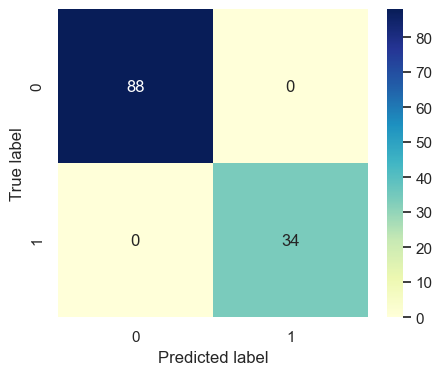

------TEST------
ACCURACy:  0.967741935483871
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 0.9375
POSITIVE RECALL (Y=1): 0.9375
POSITIVE PRECISION (Y=1): 1.0
[[15  0]
 [ 1 15]]


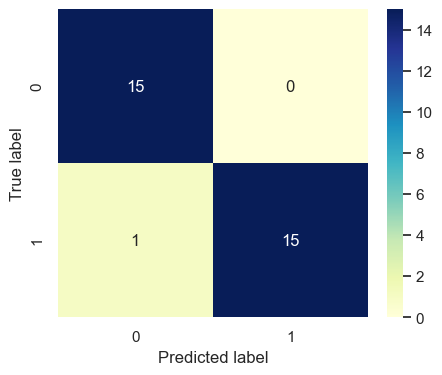

In [65]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

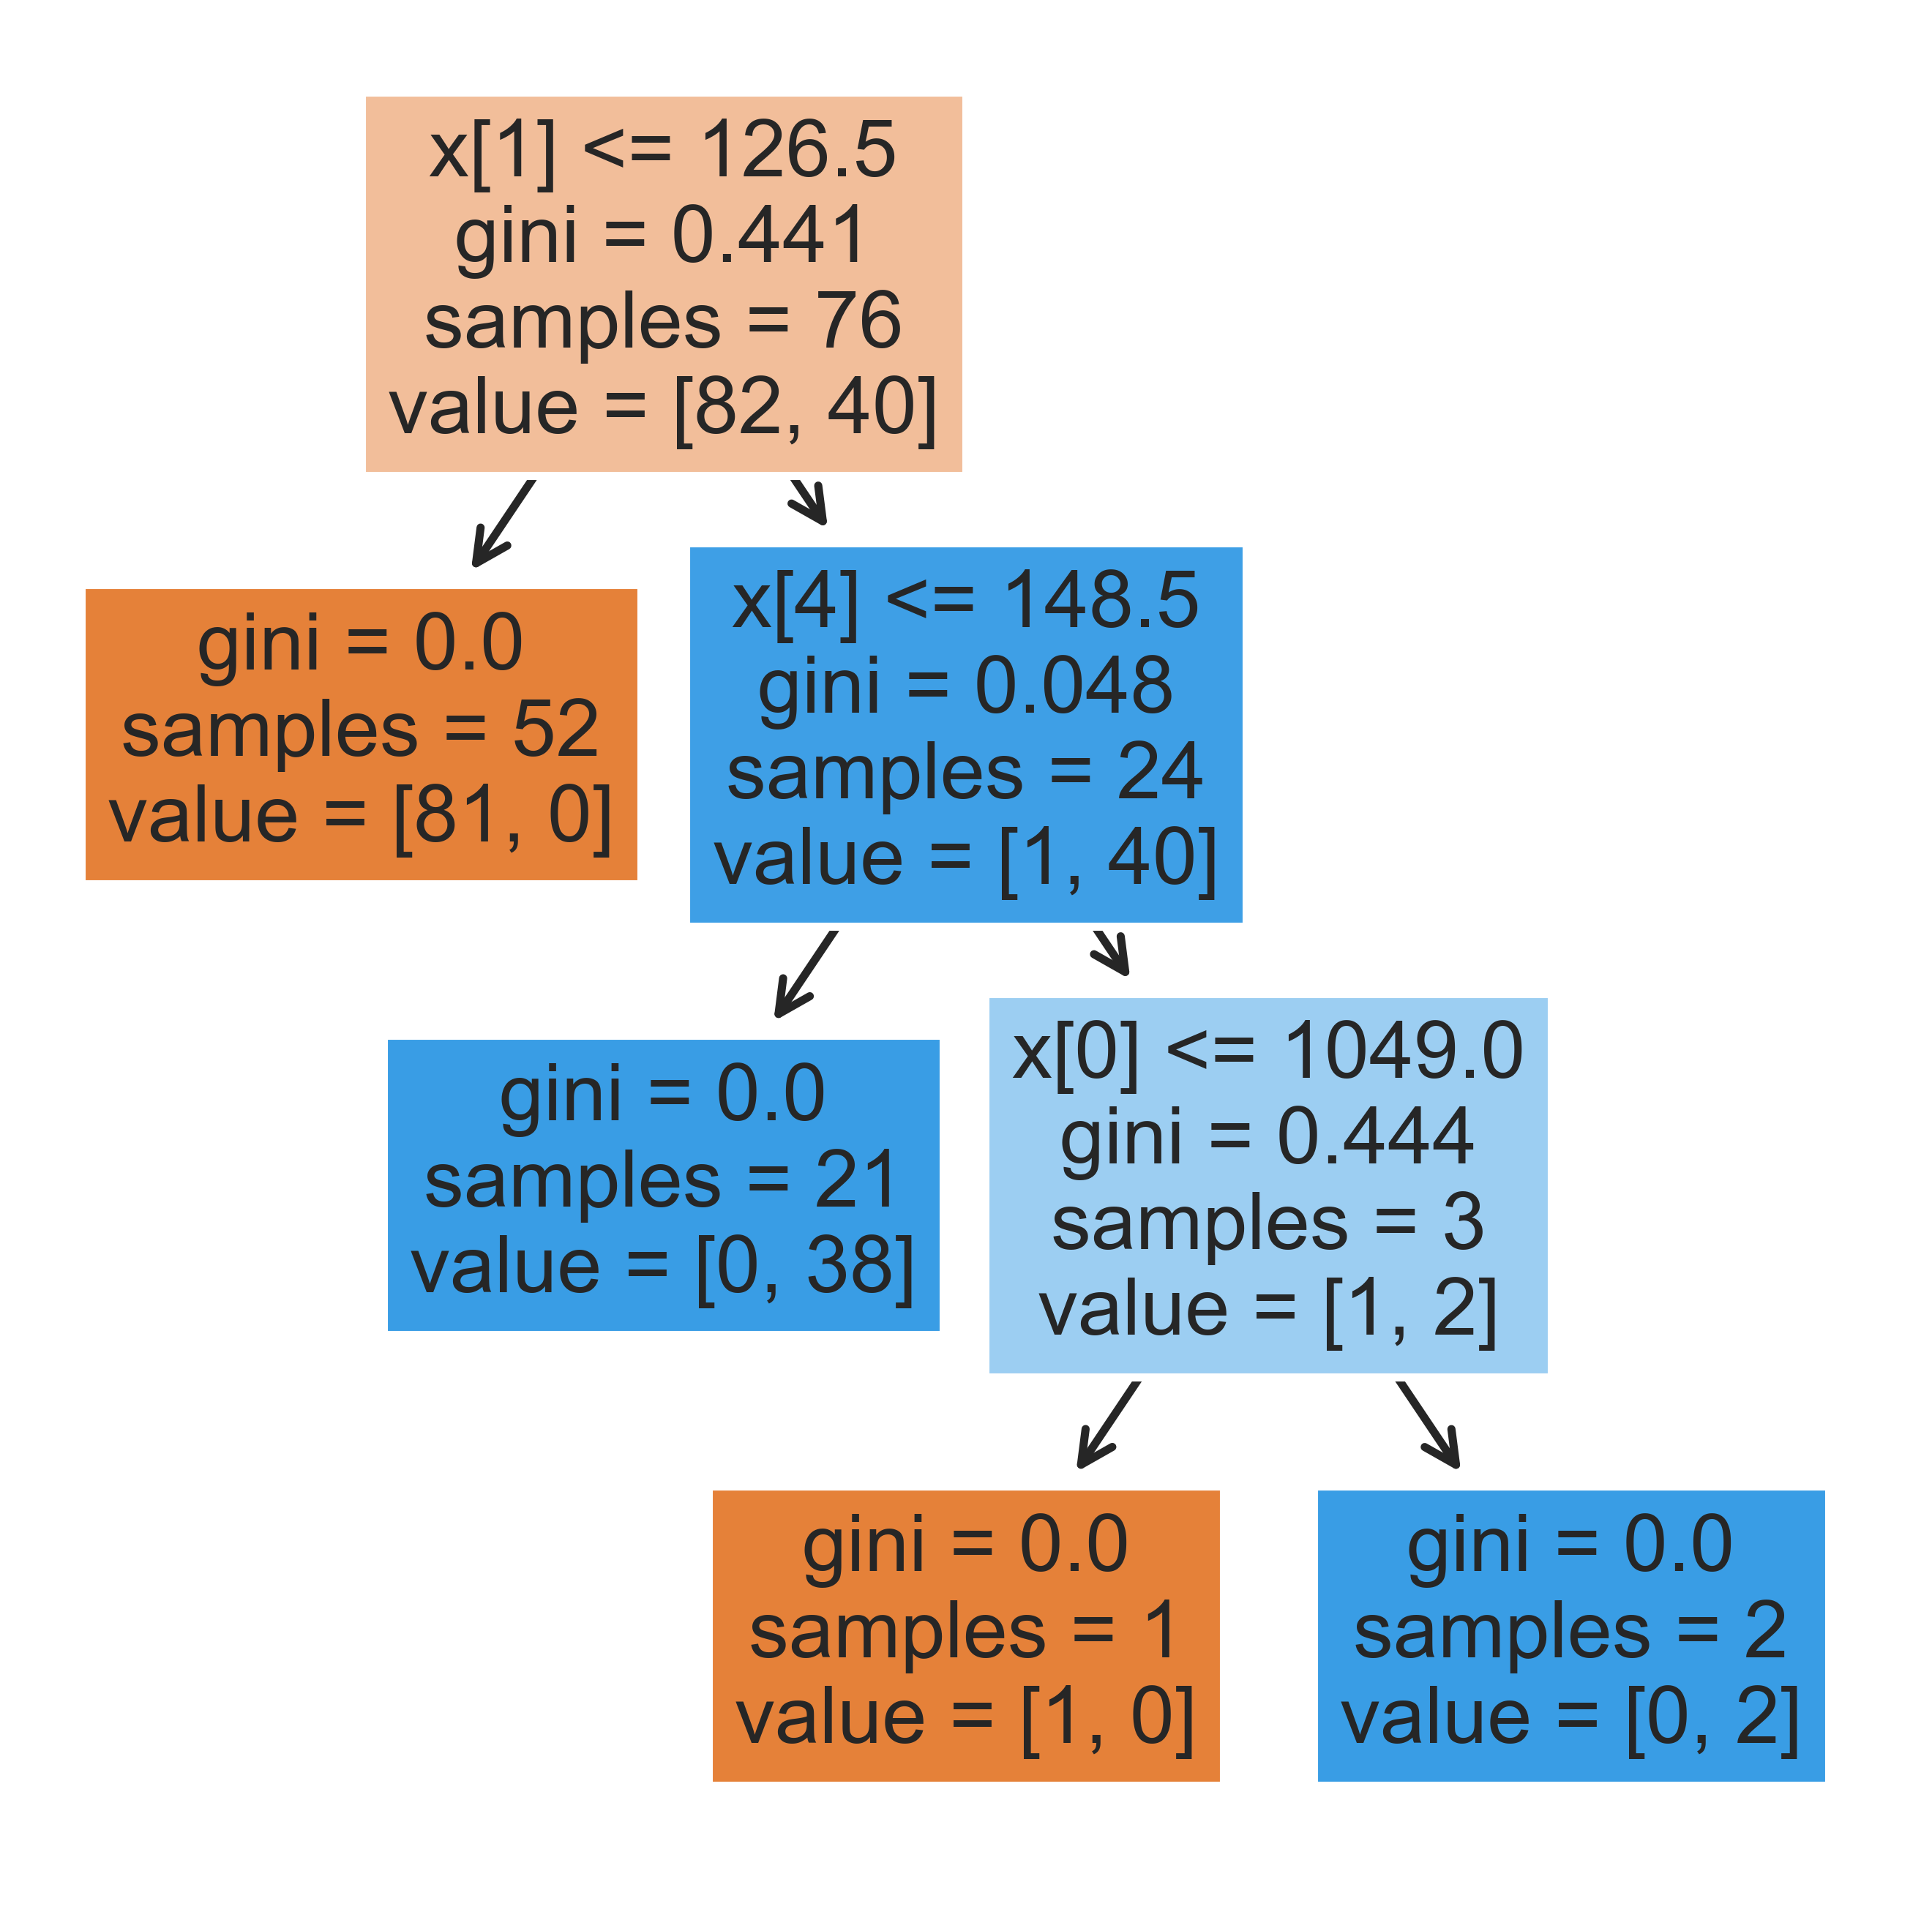

In [66]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')


### Analysis
Based on the training result, 
ACCURACY:  1.0, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 1.0, 
POSITIVE RECALL (Y=1): 1.0, 
POSITIVE PRECISION (Y=1): 1.0, 
The accuracy, negative recall, negative precision, positive recall, positive precision are all 100%, which shows the training result can 100% predict the label, which is an awesome performance. Thus the model for the training set perform well.

Based on the test result:
ACCURACY:  0.967741935483871, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 0.9375, 
POSITIVE RECALL (Y=1): 0.9375, 
POSITIVE PRECISION (Y=1): 1.0, 
Accuracy is 0.9677 and accuracy measures the overall correctness of a classification model. 96.77% means the model is not 100% correctly predicted the data, which may needs a little imporve. The negative recall and precision is 1 which mean 100% right, which means it perform well. The native precision measures the accuracy of the model when it predicts the negative class (class 0), and the sore is 0.9375, which may needs improve. The positive recall measures the ability of the model to correctly identify instances belonging to the positive class (class 1), and the score is 0.9375, so this may needs a little imporvement as well.

Thus for better fit in the model, I did a hyper-parameter Turning to see if there's better model paramter to fit in.

## Hyperparameter Tuning

In [67]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,10):
    model = RandomForestClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), recall_score(y_train, yp_train, pos_label = 0), recall_score(y_train, yp_train, pos_label = 1)])

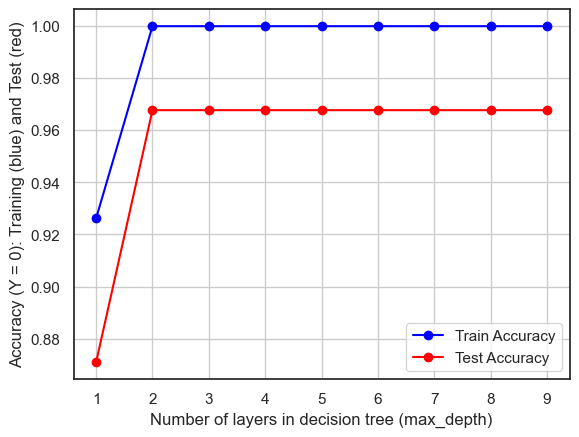

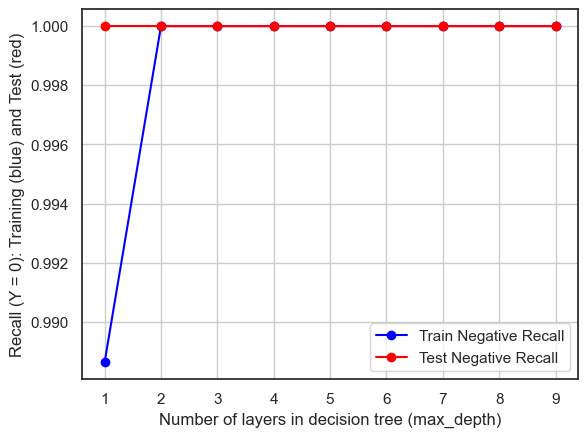

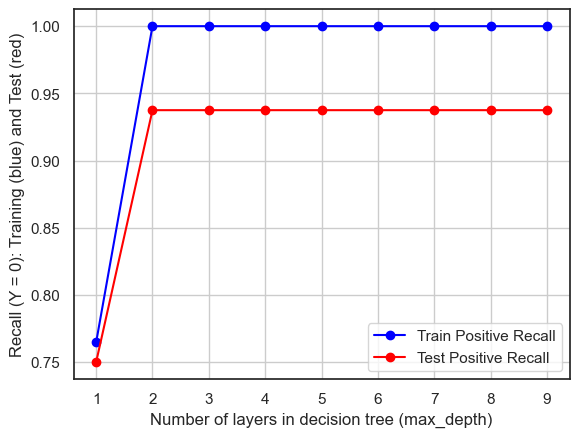

In [68]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)

# NOTE: THERE IS A TYPO IN THE THIRD PLOT, IT SHOULD BE RECALL IN THE Y-AXIS LABEL NOT ACCURACY
train_df = pd.DataFrame(train_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])
test_df = pd.DataFrame(test_results, columns = ['max_depth', 'accuracy', 'recall_negative', 'recall_positive'])

plt.plot(train_df['max_depth'], train_df['accuracy'], 'o-', color = 'blue', label = 'Train Accuracy')
plt.plot(test_df['max_depth'], test_df['accuracy'], 'o-', color = 'red', label = 'Test Accuracy')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Accuracy (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_negative'], 'o-', color = 'blue', label = 'Train Negative Recall')
plt.plot(test_df['max_depth'], test_df['recall_negative'], 'o-', color = 'red', label = 'Test Negative Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_df['max_depth'], train_df['recall_positive'], 'o-', color = 'blue', label = 'Train Positive Recall')
plt.plot(test_df['max_depth'], test_df['recall_positive'], 'o-', color = 'red', label = 'Test Positive Recall')
plt.xlabel('Number of layers in decision tree (max_depth)')
plt.ylabel('Recall (Y = 0): Training (blue) and Test (red)')
plt.legend()
plt.grid(True)
plt.show()

In the Hype-parameter above, I let the model iterate between different depth of decision tree and then use the random forest model to fit in and  try to find the optimal layers of decision tree and then form the  which gives the highest accuracy and recall score, and this shows the optimal paramater for this random forest.
Based on the graph 1 above, we can see that when the layer reach 2 both the train and test accuracy can reach 100% and the score line become flat, even when the layers numbers become higher, the model performance is not improving. Same situation appear in the both recall score plot. So, after depth=2, the model may become a little overfitting.
Thus, we can conclude that when the depth=2, the model is optimal. Next we will use this optimal depth.

## Train Optimal

In [69]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = RandomForestClassifier(max_depth=2)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACy:  0.9918032786885246
NEGATIVE RECALL (Y=0):  0.9886363636363636
NEGATIVE PRECISION (Y=0): 1.0
POSITIVE RECALL (Y=1): 1.0
POSITIVE PRECISION (Y=1): 0.9714285714285714
[[87  1]
 [ 0 34]]


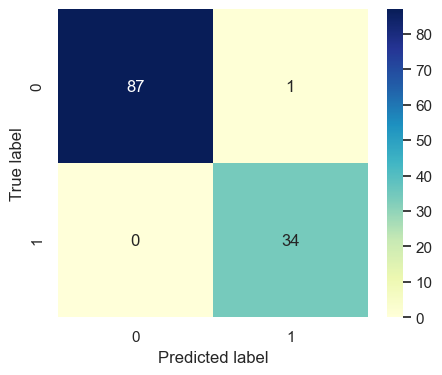

------TEST------
ACCURACy:  0.967741935483871
NEGATIVE RECALL (Y=0):  1.0
NEGATIVE PRECISION (Y=0): 0.9375
POSITIVE RECALL (Y=1): 0.9375
POSITIVE PRECISION (Y=1): 1.0
[[15  0]
 [ 1 15]]


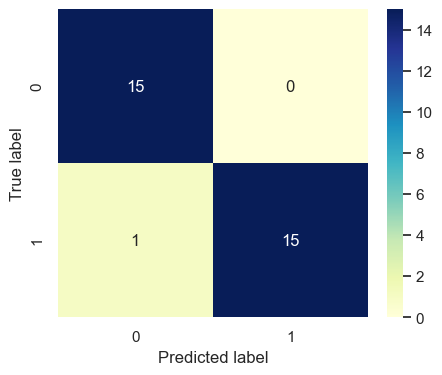

In [71]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

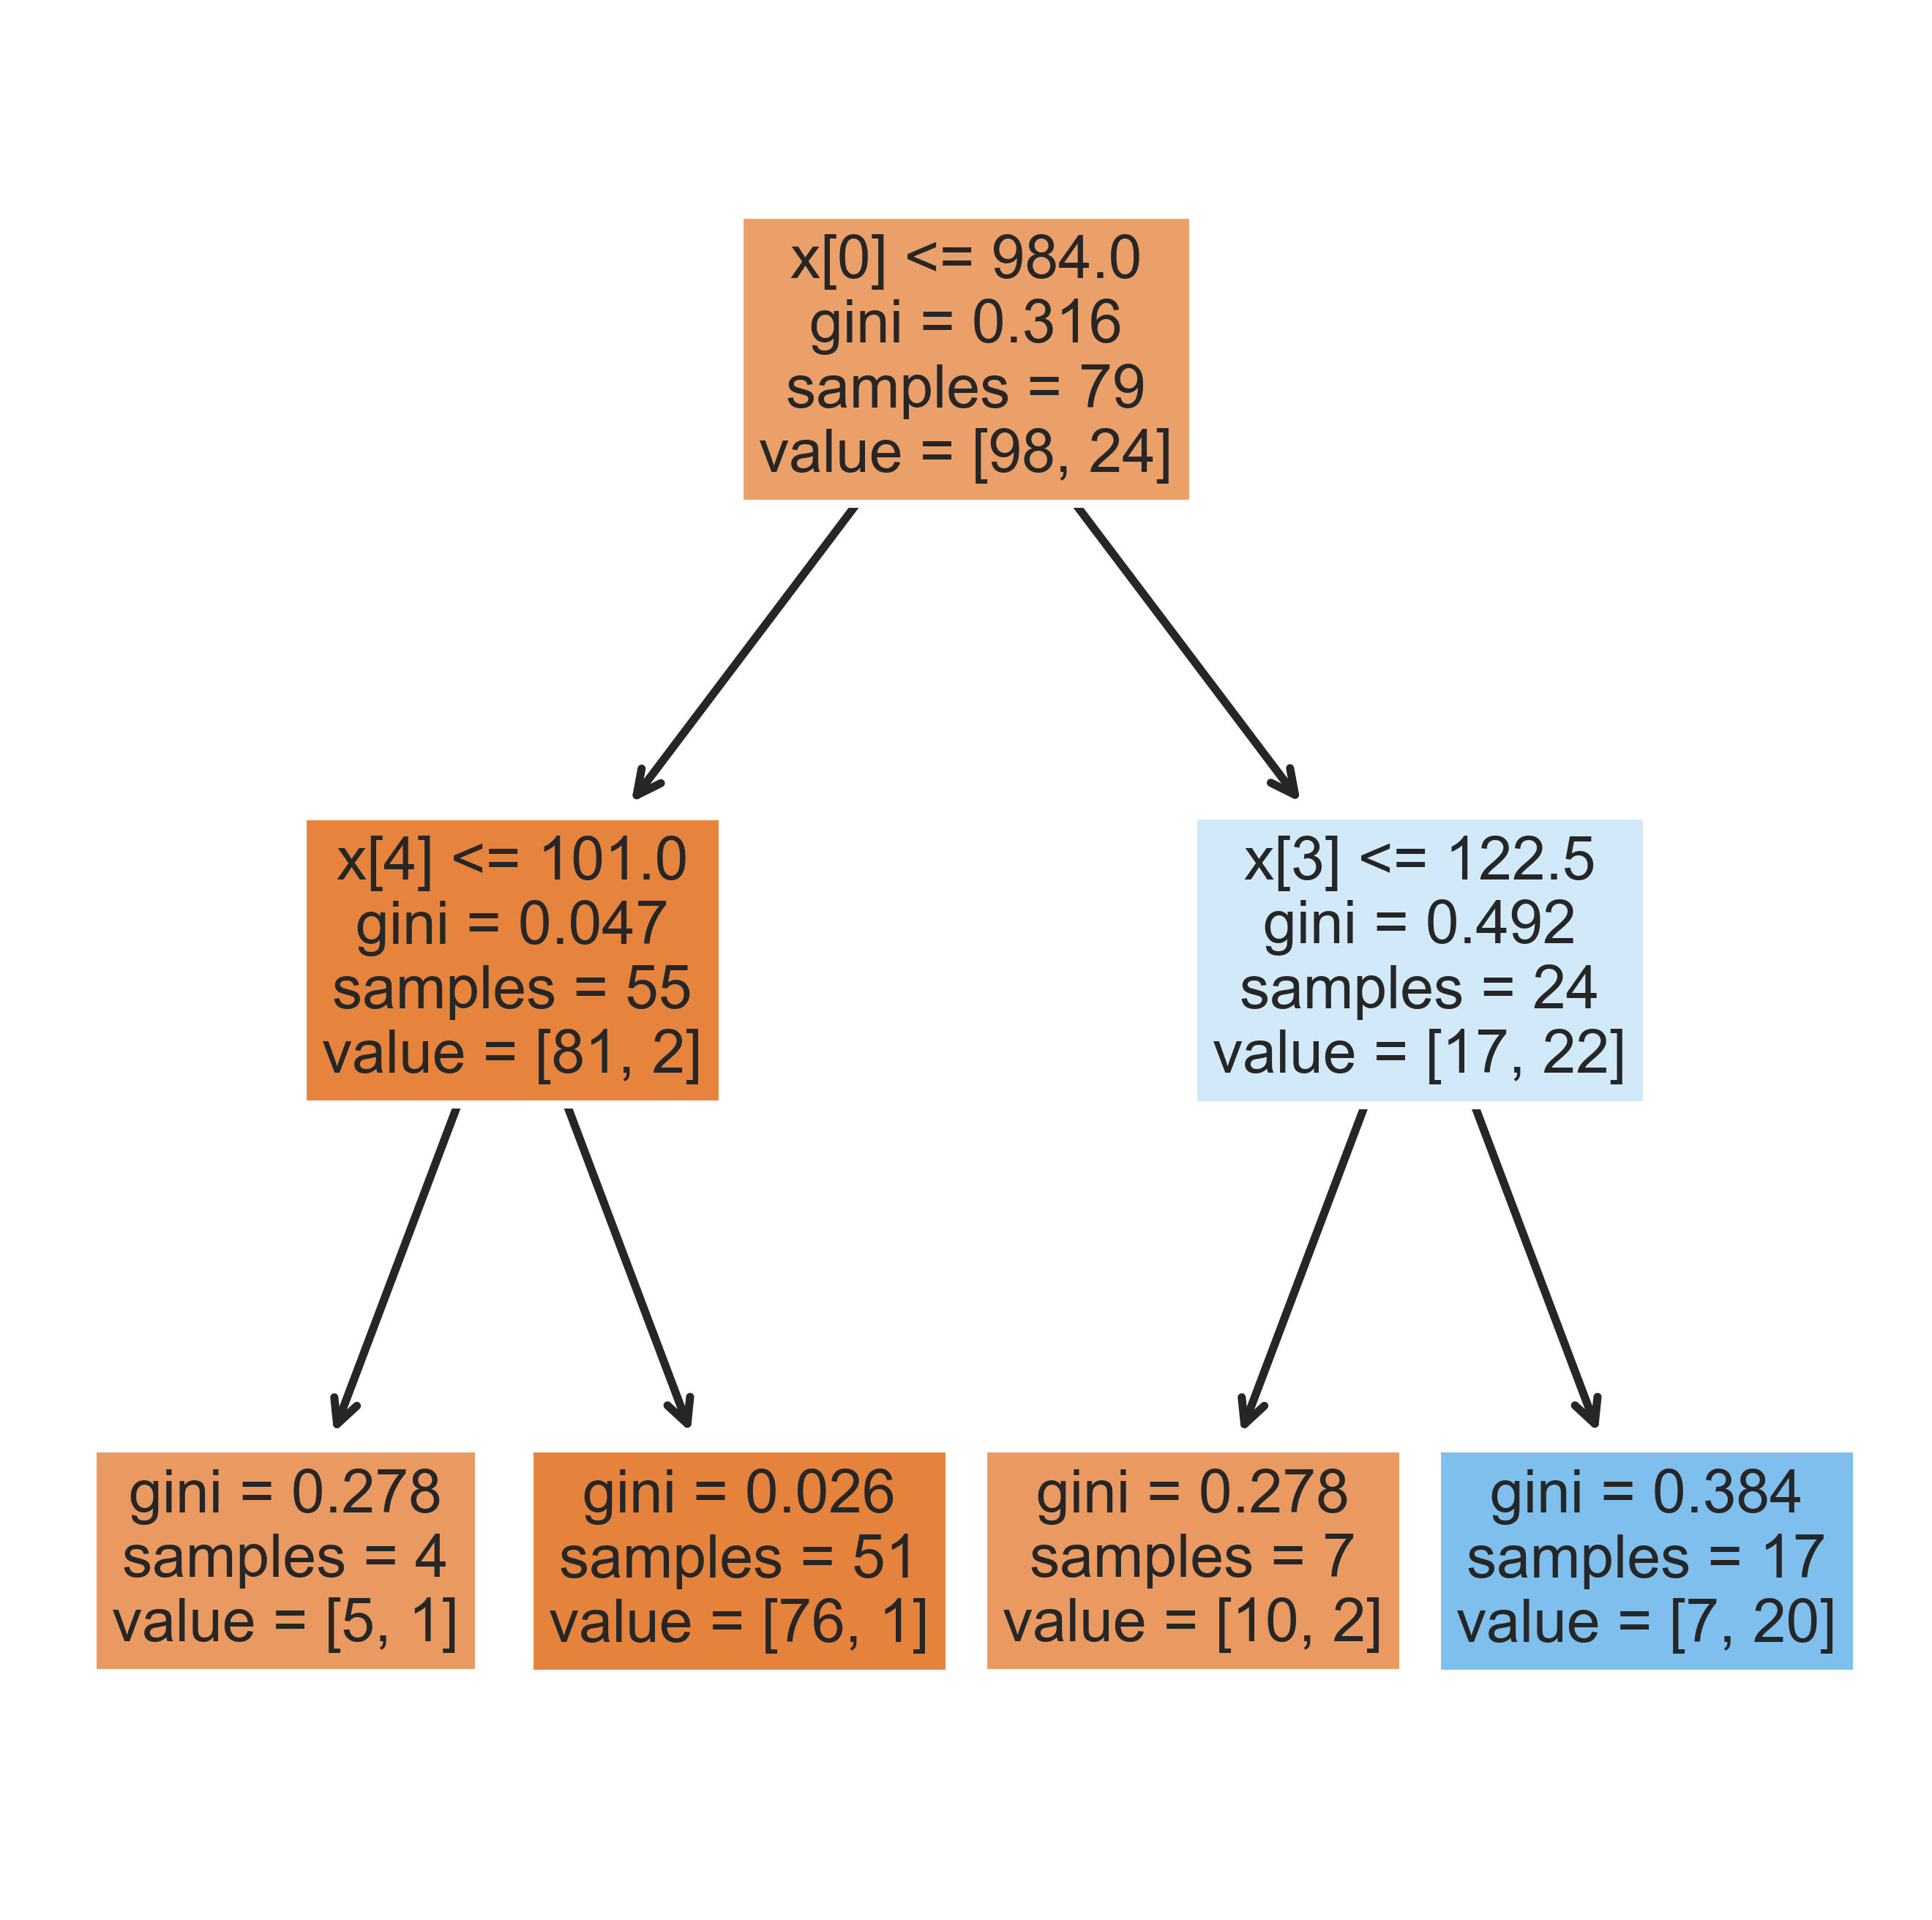

In [72]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')

### Analysis
The accuracy score, negative recall and positive Precision score are not 100% for the test set. The accuracy score, negative precision, and positive precision score are not 100% of the training set as well. However, they all passed 90%, which are good enogh to prove the model perform well to predict the label.

# Conclusion
In the decision tree part, I use the method of DecisionTreeClassifier() with max_depth= 3 to get the optimal fit for the data and only 1 label was predicted wrong. The final result for the test set is:
ACCURACY:  0.967741935483871, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 0.9375, 
POSITIVE RECALL (Y=1): 0.9375, 
POSITIVE PRECISION (Y=1): 1.0, 
Based on this result, all score are above 90%, so we can see this is a good model for predict the label of public the buying intent on the mobile phone products.

In the Random forest part, I use the method of RandomForestClassifier() with max_depth= 2 to get the optimal fit for the data and only 1 label was predicted wrong. The final result for the test set is:
ACCURACy:  0.967741935483871, 
NEGATIVE RECALL (Y=0):  1.0, 
NEGATIVE PRECISION (Y=0): 0.9375, 
POSITIVE RECALL (Y=1): 0.9375, 
POSITIVE PRECISION (Y=1): 1.0, 
Based on this result, all score are above 90%, we can see this is a good model for predict the label of public the buying intent on the mobile phone products.

In conclusion, both decision tree and random forest can form a good model to predict the classification label for my dataset. They are strong tool for predicting wheher a phone would be popular in the market and whether a customer would willing to buy this product or not. 
